## Imports

In [1]:
import pandas as pd 
import numpy as np 

from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')m

2023-07-25 21:25:17.023925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

## Loading CSV

In [3]:
music = pd.read_csv('/Users/kellyjara/Desktop/Project 5 (copy)/Data/music.csv')
music_df = pd.DataFrame(music)

In [4]:
music_df

,Unnamed: 0,file_name,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,...,tntz_min,tntz_max,melspec_mean,melspec_var,melspec_min,melspec_max,rms_mean,rms_var,tempo,genre_y
0,0,pop_19.wav,-8.942821,64.183520,-1.467964,23.011240,4.736657,6.307176,8.763370,8.697861,...,23.226763,25.148724,22.026917,16.932308,12.370562,8.246605,19.116907,11.814075,30.205139,pop
1,1,pop_25.wav,-45.097984,88.633490,8.985597,31.276129,6.828823,15.752106,0.584817,10.050541,...,12.809576,15.228867,17.706797,21.371332,16.580214,12.868278,15.292180,53.268745,16.516775,pop
2,2,pop_31.wav,-106.645210,65.831770,12.572899,30.452550,16.271381,3.800628,-1.045976,4.102991,...,57.029930,33.422485,22.549700,19.325535,4.672528,16.462545,8.511788,15.057601,5.709808,pop
3,3,pop.00027.wav,-75.366130,83.334880,10.703896,14.455102,14.244521,7.410257,5.279713,-0.400126,...,36.525730,20.675253,10.802331,14.559845,15.033474,5.253385,9.168291,4.383974,5.567156,pop
4,4,pop.00033.wav,-69.001930,73.770000,-12.468982,9.536624,-0.045610,12.718271,3.165059,-0.084658,...,5.814939,4.739766,8.573198,7.718379,8.373836,5.137630,4.571923,2.318799,5.877789,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1512,disco.00062.wav,-107.867600,81.936584,-30.634070,41.331936,-8.509501,31.333730,-8.869069,26.030900,...,1.811980,4.863695,3.857496,4.530632,5.103957,2.381736,1.127911,1.859340,0.916801,disco
1513,1513,disco.00089.wav,-114.932045,113.463870,-29.804312,42.612103,-10.326010,26.973412,-14.493735,21.240532,...,4.009619,4.307391,7.870385,8.390940,6.161437,2.004640,2.895298,3.721590,1.561397,disco
1514,1514,disco.00088.wav,-97.885620,101.003600,-40.547610,51.050190,-11.709620,25.064747,-14.048207,17.197395,...,2.948735,2.458494,2.252382,2.389016,3.919963,2.275582,2.969935,1.674802,1.885246,disco
1515,1515,disco.00063.wav,-51.776085,70.331350,-3.911701,49.742280,1.587971,35.703487,-4.088695,24.787909,...,5.689360,7.742268,8.657559,7.667148,4.423709,4.082315,3.176005,2.357672,1.589757,disco


In [5]:
music_df.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   file_name        1517 non-null   object 
 1   mfcc_mean        1517 non-null   float64
 2   mfcc_var         1517 non-null   float64
 3   mfcc_min         1517 non-null   float64
 4   mfcc_max         1517 non-null   float64
 5   mfcc1_mean       1517 non-null   float64
 6   mfcc1_var        1517 non-null   float64
 7   mfcc1_min        1517 non-null   float64
 8   mfcc1_max        1517 non-null   float64
 9   mfcc2_mean       1517 non-null   float64
 10  mfcc2_var        1517 non-null   float64
 11  mfcc2_min        1517 non-null   float64
 12  mfcc2_max        1517 non-null   float64
 13  delta_mean       1517 non-null   float64
 14  delta_var        1517 non-null   float64
 15  delta2_mean      1517 non-null   float64
 16  delta2_var       1517 non-null   float64
 17  harmonic_mean 

In [7]:
music_df['genre_x'].value_counts()

blues        206
pop          201
hiphop       201
rock         200
country      149
classical    137
jazz         123
metal        100
reggae       100
disco        100
Name: genre_x, dtype: int64

In [8]:
music_df['genre_y'].value_counts()

blues        206
pop          201
hiphop       201
rock         200
country      149
classical    137
jazz         123
metal        100
reggae       100
disco        100
Name: genre_y, dtype: int64

In [9]:
music_df.drop(columns = 'genre_x', inplace = True)

In [10]:
music_df

,file_name,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,mfcc2_mean,...,tntz_min,tntz_max,melspec_mean,melspec_var,melspec_min,melspec_max,rms_mean,rms_var,tempo,genre_y
0,pop_19.wav,-8.942821,64.183520,-1.467964,23.011240,4.736657,6.307176,8.763370,8.697861,0.020061,...,23.226763,25.148724,22.026917,16.932308,12.370562,8.246605,19.116907,11.814075,30.205139,pop
1,pop_25.wav,-45.097984,88.633490,8.985597,31.276129,6.828823,15.752106,0.584817,10.050541,0.788925,...,12.809576,15.228867,17.706797,21.371332,16.580214,12.868278,15.292180,53.268745,16.516775,pop
2,pop_31.wav,-106.645210,65.831770,12.572899,30.452550,16.271381,3.800628,-1.045976,4.102991,-2.589358,...,57.029930,33.422485,22.549700,19.325535,4.672528,16.462545,8.511788,15.057601,5.709808,pop
3,pop.00027.wav,-75.366130,83.334880,10.703896,14.455102,14.244521,7.410257,5.279713,-0.400126,5.717757,...,36.525730,20.675253,10.802331,14.559845,15.033474,5.253385,9.168291,4.383974,5.567156,pop
4,pop.00033.wav,-69.001930,73.770000,-12.468982,9.536624,-0.045610,12.718271,3.165059,-0.084658,2.522358,...,5.814939,4.739766,8.573198,7.718379,8.373836,5.137630,4.571923,2.318799,5.877789,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,disco.00062.wav,-107.867600,81.936584,-30.634070,41.331936,-8.509501,31.333730,-8.869069,26.030900,-8.280142,...,1.811980,4.863695,3.857496,4.530632,5.103957,2.381736,1.127911,1.859340,0.916801,disco
1513,disco.00089.wav,-114.932045,113.463870,-29.804312,42.612103,-10.326010,26.973412,-14.493735,21.240532,-17.650540,...,4.009619,4.307391,7.870385,8.390940,6.161437,2.004640,2.895298,3.721590,1.561397,disco
1514,disco.00088.wav,-97.885620,101.003600,-40.547610,51.050190,-11.709620,25.064747,-14.048207,17.197395,-9.623669,...,2.948735,2.458494,2.252382,2.389016,3.919963,2.275582,2.969935,1.674802,1.885246,disco
1515,disco.00063.wav,-51.776085,70.331350,-3.911701,49.742280,1.587971,35.703487,-4.088695,24.787909,-9.707024,...,5.689360,7.742268,8.657559,7.667148,4.423709,4.082315,3.176005,2.357672,1.589757,disco


In [11]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   file_name        1517 non-null   object 
 1   mfcc_mean        1517 non-null   float64
 2   mfcc_var         1517 non-null   float64
 3   mfcc_min         1517 non-null   float64
 4   mfcc_max         1517 non-null   float64
 5   mfcc1_mean       1517 non-null   float64
 6   mfcc1_var        1517 non-null   float64
 7   mfcc1_min        1517 non-null   float64
 8   mfcc1_max        1517 non-null   float64
 9   mfcc2_mean       1517 non-null   float64
 10  mfcc2_var        1517 non-null   float64
 11  mfcc2_min        1517 non-null   float64
 12  mfcc2_max        1517 non-null   float64
 13  delta_mean       1517 non-null   float64
 14  delta_var        1517 non-null   float64
 15  delta2_mean      1517 non-null   float64
 16  delta2_var       1517 non-null   float64
 17  harmonic_mean 

In [12]:
music_df2 = music_df.drop(columns = ['file_name'])

In [13]:
music_df2

,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,mfcc2_mean,mfcc2_var,...,tntz_min,tntz_max,melspec_mean,melspec_var,melspec_min,melspec_max,rms_mean,rms_var,tempo,genre_y
0,-8.942821,64.183520,-1.467964,23.011240,4.736657,6.307176,8.763370,8.697861,0.020061,8.945642,...,23.226763,25.148724,22.026917,16.932308,12.370562,8.246605,19.116907,11.814075,30.205139,pop
1,-45.097984,88.633490,8.985597,31.276129,6.828823,15.752106,0.584817,10.050541,0.788925,7.602591,...,12.809576,15.228867,17.706797,21.371332,16.580214,12.868278,15.292180,53.268745,16.516775,pop
2,-106.645210,65.831770,12.572899,30.452550,16.271381,3.800628,-1.045976,4.102991,-2.589358,1.586828,...,57.029930,33.422485,22.549700,19.325535,4.672528,16.462545,8.511788,15.057601,5.709808,pop
3,-75.366130,83.334880,10.703896,14.455102,14.244521,7.410257,5.279713,-0.400126,5.717757,3.361804,...,36.525730,20.675253,10.802331,14.559845,15.033474,5.253385,9.168291,4.383974,5.567156,pop
4,-69.001930,73.770000,-12.468982,9.536624,-0.045610,12.718271,3.165059,-0.084658,2.522358,2.874675,...,5.814939,4.739766,8.573198,7.718379,8.373836,5.137630,4.571923,2.318799,5.877789,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-107.867600,81.936584,-30.634070,41.331936,-8.509501,31.333730,-8.869069,26.030900,-8.280142,17.894875,...,1.811980,4.863695,3.857496,4.530632,5.103957,2.381736,1.127911,1.859340,0.916801,disco
1513,-114.932045,113.463870,-29.804312,42.612103,-10.326010,26.973412,-14.493735,21.240532,-17.650540,17.097872,...,4.009619,4.307391,7.870385,8.390940,6.161437,2.004640,2.895298,3.721590,1.561397,disco
1514,-97.885620,101.003600,-40.547610,51.050190,-11.709620,25.064747,-14.048207,17.197395,-9.623669,16.973530,...,2.948735,2.458494,2.252382,2.389016,3.919963,2.275582,2.969935,1.674802,1.885246,disco
1515,-51.776085,70.331350,-3.911701,49.742280,1.587971,35.703487,-4.088695,24.787909,-9.707024,22.039282,...,5.689360,7.742268,8.657559,7.667148,4.423709,4.082315,3.176005,2.357672,1.589757,disco


## OneHotEncoding Genres

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [15]:
genres_df = music_df2[['genre_y']]

In [16]:
onehot_encode = OneHotEncoder(sparse = False)

genres_encoded = onehot_encode.fit_transform(genres_df)

encoded_df = pd.DataFrame(genres_encoded, columns = onehot_encode.get_feature_names_out(['genre_y']))

result_df = pd.concat([music_df2, encoded_df], axis = 1)

result_df.drop(columns = ['genre_y'], inplace = True)

In [17]:
result_df

,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,mfcc2_mean,mfcc2_var,...,genre_y_blues,genre_y_classical,genre_y_country,genre_y_disco,genre_y_hiphop,genre_y_jazz,genre_y_metal,genre_y_pop,genre_y_reggae,genre_y_rock
0,-8.942821,64.183520,-1.467964,23.011240,4.736657,6.307176,8.763370,8.697861,0.020061,8.945642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-45.097984,88.633490,8.985597,31.276129,6.828823,15.752106,0.584817,10.050541,0.788925,7.602591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-106.645210,65.831770,12.572899,30.452550,16.271381,3.800628,-1.045976,4.102991,-2.589358,1.586828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-75.366130,83.334880,10.703896,14.455102,14.244521,7.410257,5.279713,-0.400126,5.717757,3.361804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-69.001930,73.770000,-12.468982,9.536624,-0.045610,12.718271,3.165059,-0.084658,2.522358,2.874675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-107.867600,81.936584,-30.634070,41.331936,-8.509501,31.333730,-8.869069,26.030900,-8.280142,17.894875,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1513,-114.932045,113.463870,-29.804312,42.612103,-10.326010,26.973412,-14.493735,21.240532,-17.650540,17.097872,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1514,-97.885620,101.003600,-40.547610,51.050190,-11.709620,25.064747,-14.048207,17.197395,-9.623669,16.973530,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1515,-51.776085,70.331350,-3.911701,49.742280,1.587971,35.703487,-4.088695,24.787909,-9.707024,22.039282,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mfcc_mean          1517 non-null   float64
 1   mfcc_var           1517 non-null   float64
 2   mfcc_min           1517 non-null   float64
 3   mfcc_max           1517 non-null   float64
 4   mfcc1_mean         1517 non-null   float64
 5   mfcc1_var          1517 non-null   float64
 6   mfcc1_min          1517 non-null   float64
 7   mfcc1_max          1517 non-null   float64
 8   mfcc2_mean         1517 non-null   float64
 9   mfcc2_var          1517 non-null   float64
 10  mfcc2_min          1517 non-null   float64
 11  mfcc2_max          1517 non-null   float64
 12  delta_mean         1517 non-null   float64
 13  delta_var          1517 non-null   float64
 14  delta2_mean        1517 non-null   float64
 15  delta2_var         1517 non-null   float64
 16  harmonic_mean      1517 

## Test-Train-Split

In [19]:
X = result_df.drop(columns=['genre_y_blues', 'genre_y_classical', 'genre_y_country', 'genre_y_disco', 'genre_y_hiphop',
                     'genre_y_jazz', 'genre_y_metal', 'genre_y_pop', 'genre_y_reggae', 'genre_y_rock'])
y = result_df[['genre_y_blues', 'genre_y_classical', 'genre_y_country', 'genre_y_disco', 'genre_y_hiphop',
        'genre_y_jazz', 'genre_y_metal', 'genre_y_pop', 'genre_y_reggae', 'genre_y_rock']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Decision Tree - Model 1

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [24]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, random_state = 24)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=24)

In [25]:
print('Training:', dt.score(X_train_scaled, y_train))
print('Test:', dt.score(X_test_scaled, y_test))

Training: 0.9427942794279428
Test: 0.5756578947368421


In [26]:
dt_preds = dt.predict(X_test_scaled)

In [27]:
accuracy = accuracy_score(y_test, dt_preds)
print('Accuracy:',accuracy)
precision = precision_score(y_test, dt_preds, average = 'macro')
print('Precission:',precision)
recall = recall_score(y_test, dt_preds, average = 'macro')
print('Recall:',recall)

Accuracy: 0.5756578947368421
Precission: 0.5837985678775152
Recall: 0.5858158983430499


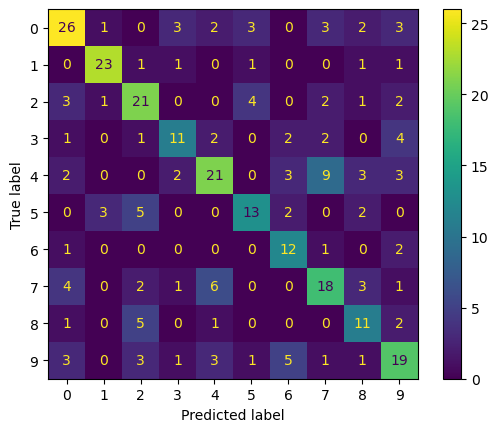

In [28]:
dt_cm =confusion_matrix(y_test.values.argmax(axis=1), 
                        dt_preds.argmax(axis=1));
ConfusionMatrixDisplay(dt_cm).plot()

In [29]:
roc_auc_score(y_test,dt_preds)

0.7701313348505953

In [30]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    dt_preds,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.77


## Random Forest - Model 2

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [33]:
rf_pred = rf.predict(X_test_scaled)

In [34]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print('Accuracy:', rf_accuracy)
rf_precision = precision_score(y_test, rf_pred, average = 'macro')
print('Precission:',rf_precision)
rf_recall = recall_score(y_test, rf_pred, average = 'macro')
print('Recall:',rf_recall)

Accuracy: 0.4440789473684211
Precission: 0.8608765328874025
Recall: 0.44158895758177563


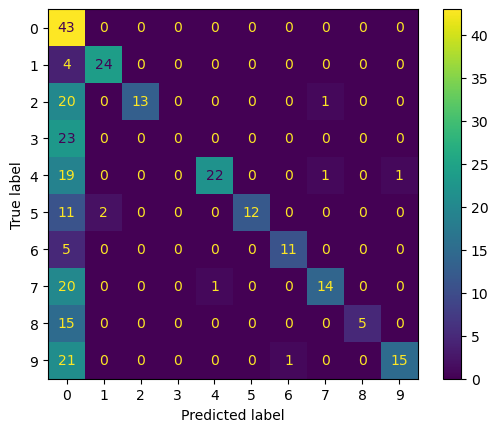

In [35]:
rf_cm =confusion_matrix(y_test.values.argmax(axis=1), 
                        rf_pred.argmax(axis=1));
ConfusionMatrixDisplay(rf_cm).plot()

## K-Nearest Neighbor - Model 3

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

In [37]:
def cross_validation(X_train, y_train, k, num_split = 20):
    
    X_train = X_train.values
    y_train = y_train.values
    
    score_train_list = []
    score_val_list = []
    
    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):


        # train and validation splitting 
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]

        #create/fit the Standard scaler on the train fold
        scaler = StandardScaler()
        X_tf_sc = scaler.fit_transform(X_train_fold)
        # transform validation fold
        X_vld_sc = scaler.transform(X_val_fold)

        # create/fit knearest neighbor
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        knn.fit(X_tf_sc, y_train_fold)
        
        #scores
        accuracy_train = knn.score(X_tf_sc, y_train_fold)
        accuracy_val = knn.score(X_vld_sc, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)
    
    return {'k': k, 'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

In [38]:
crossval_df = pd.DataFrame(columns = ['k', 'train', 'validation'])

for k in np.arange(1,100):
    crossval_df = crossval_df.append(cross_validation(X_train, y_train, k, 5), ignore_index = True)

In [39]:
crossval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   k           99 non-null     float64
 1   train       99 non-null     float64
 2   validation  99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


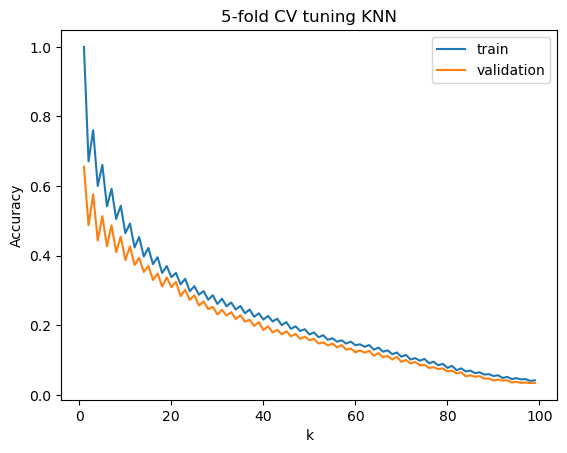

In [40]:
fig, ax = plt.subplots()
sns.lineplot(x = 'k', y = 'train', 
             data = crossval_df, 
             ax = ax, label = 'train')
sns.lineplot(x = 'k', y = 'validation', 
             data = crossval_df,
             ax = ax, label = 'validation')
ax.set_ylabel('Accuracy')
ax.set_title('5-fold CV tuning KNN')
plt.show()

In [41]:
crossval_df.iloc[crossval_df['validation'].idxmax()]

k             1.000000
train         1.000000
validation    0.655625
Name: 0, dtype: float64

In [42]:
fulltrain_scaler = StandardScaler()
X_train_sc = fulltrain_scaler.fit_transform(X_train)
X_test_sc = fulltrain_scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_sc, y_train)

y_pred = knn.predict(X_test_sc)

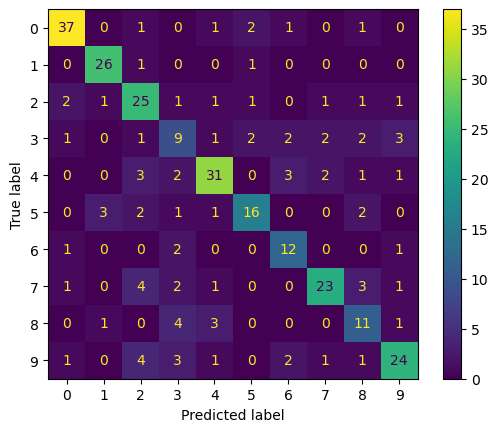

In [43]:
knn_cm =confusion_matrix(y_test.values.argmax(axis=1), 
                        y_pred.argmax(axis=1));
ConfusionMatrixDisplay(knn_cm).plot()

In [44]:
knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', knn_accuracy)
knn_precision = precision_score(y_test, y_pred, average = 'macro')
print('Precission:',knn_precision)
knn_recall = recall_score(y_test, y_pred, average = 'macro')
print('Recall:',knn_recall)

Accuracy: 0.7039473684210527
Precission: 0.682930706680799
Recall: 0.6882356748673288


In [45]:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

## CNN - Model 4

In [46]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import *

from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer

In [47]:
X_train_sc.shape

(909, 39)

In [48]:
X_tr_sc = scaler.fit_transform(np.array(X_train, dtype = float))
X_ts_sc = scaler.transform(np.array(X_test, dtype = float))
X_v_sc = scaler.transform(np.array(X_val, dtype = float))

In [49]:
model = Sequential()

model.add(layers.Dense(512, activation = 'relu', input_shape = (X_tr_sc.shape[1],)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.2))
    
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.2))
    
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))
    
model.add(layers.Dense(10, activation = 'softmax'))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               20480     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [51]:
model.compile(optimizer = 'Adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [52]:
cnn = model.fit(X_tr_sc, y_train, 
                epochs = 200, batch_size = 10,
               validation_data = (X_v_sc, y_val))

Epoch 1/200
91/91 [==============================] - 2s 8ms/step - loss: 1.8822 - accuracy: 0.3377 - val_loss: 1.5422 - val_accuracy: 0.4309
Epoch 2/200
91/91 [==============================] - 0s 5ms/step - loss: 1.4237 - accuracy: 0.5072 - val_loss: 1.2982 - val_accuracy: 0.5461
Epoch 3/200
91/91 [==============================] - 1s 6ms/step - loss: 1.2154 - accuracy: 0.5765 - val_loss: 1.2305 - val_accuracy: 0.5526
Epoch 4/200
91/91 [==============================] - 0s 5ms/step - loss: 1.0769 - accuracy: 0.6370 - val_loss: 1.2283 - val_accuracy: 0.6086
Epoch 5/200
91/91 [==============================] - 0s 5ms/step - loss: 0.9572 - accuracy: 0.6722 - val_loss: 1.1503 - val_accuracy: 0.6480
Epoch 6/200
91/91 [==============================] - 0s 5ms/step - loss: 0.8528 - accuracy: 0.7107 - val_loss: 1.1835 - val_accuracy: 0.6513
Epoch 7/200
91/91 [==============================] - 0s 5ms/step - loss: 0.7793 - accuracy: 0.7261 - val_loss: 1.1913 - val_accuracy: 0.6349
Epoch 8/200
9

Epoch 59/200
91/91 [==============================] - 0s 5ms/step - loss: 0.1375 - accuracy: 0.9626 - val_loss: 2.2432 - val_accuracy: 0.6414
Epoch 60/200
91/91 [==============================] - 0s 5ms/step - loss: 0.1621 - accuracy: 0.9560 - val_loss: 2.3819 - val_accuracy: 0.6875
Epoch 61/200
91/91 [==============================] - 0s 5ms/step - loss: 0.1454 - accuracy: 0.9648 - val_loss: 2.1653 - val_accuracy: 0.6743
Epoch 62/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0913 - accuracy: 0.9802 - val_loss: 2.3441 - val_accuracy: 0.6711
Epoch 63/200
91/91 [==============================] - 0s 5ms/step - loss: 0.1239 - accuracy: 0.9582 - val_loss: 2.1855 - val_accuracy: 0.6908
Epoch 64/200
91/91 [==============================] - 1s 5ms/step - loss: 0.0962 - accuracy: 0.9769 - val_loss: 2.2397 - val_accuracy: 0.6711
Epoch 65/200
91/91 [==============================] - 1s 6ms/step - loss: 0.0515 - accuracy: 0.9835 - val_loss: 2.1224 - val_accuracy: 0.7007
Epoch 

91/91 [==============================] - 0s 5ms/step - loss: 0.0483 - accuracy: 0.9835 - val_loss: 2.7627 - val_accuracy: 0.6908
Epoch 117/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0371 - accuracy: 0.9890 - val_loss: 2.8732 - val_accuracy: 0.6875
Epoch 118/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0434 - accuracy: 0.9901 - val_loss: 3.0918 - val_accuracy: 0.7039
Epoch 119/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0400 - accuracy: 0.9901 - val_loss: 3.0327 - val_accuracy: 0.7204
Epoch 120/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0817 - accuracy: 0.9780 - val_loss: 3.0083 - val_accuracy: 0.6908
Epoch 121/200
91/91 [==============================] - 0s 5ms/step - loss: 0.1226 - accuracy: 0.9670 - val_loss: 2.7345 - val_accuracy: 0.6809
Epoch 122/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0754 - accuracy: 0.9758 - val_loss: 2.8000 - val_accuracy: 0.6645
Epoch 123/200

91/91 [==============================] - 0s 5ms/step - loss: 0.0174 - accuracy: 0.9956 - val_loss: 2.8343 - val_accuracy: 0.6776
Epoch 174/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0073 - accuracy: 0.9967 - val_loss: 2.8588 - val_accuracy: 0.6809
Epoch 175/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0160 - accuracy: 0.9967 - val_loss: 3.1619 - val_accuracy: 0.6809
Epoch 176/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0944 - accuracy: 0.9769 - val_loss: 3.1355 - val_accuracy: 0.6875
Epoch 177/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.9945 - val_loss: 3.0846 - val_accuracy: 0.7007
Epoch 178/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 3.1370 - val_accuracy: 0.6809
Epoch 179/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0504 - accuracy: 0.9901 - val_loss: 2.9045 - val_accuracy: 0.6941
Epoch 180/200

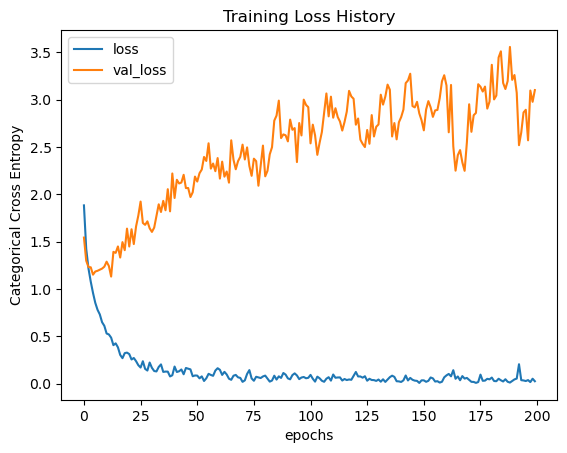

In [53]:
cnn_history = pd.DataFrame(cnn.history)
cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
cnn_history[col_list].plot()
plt.ylabel('Categorical Cross Entropy')
plt.title('Training Loss History')
plt.show()

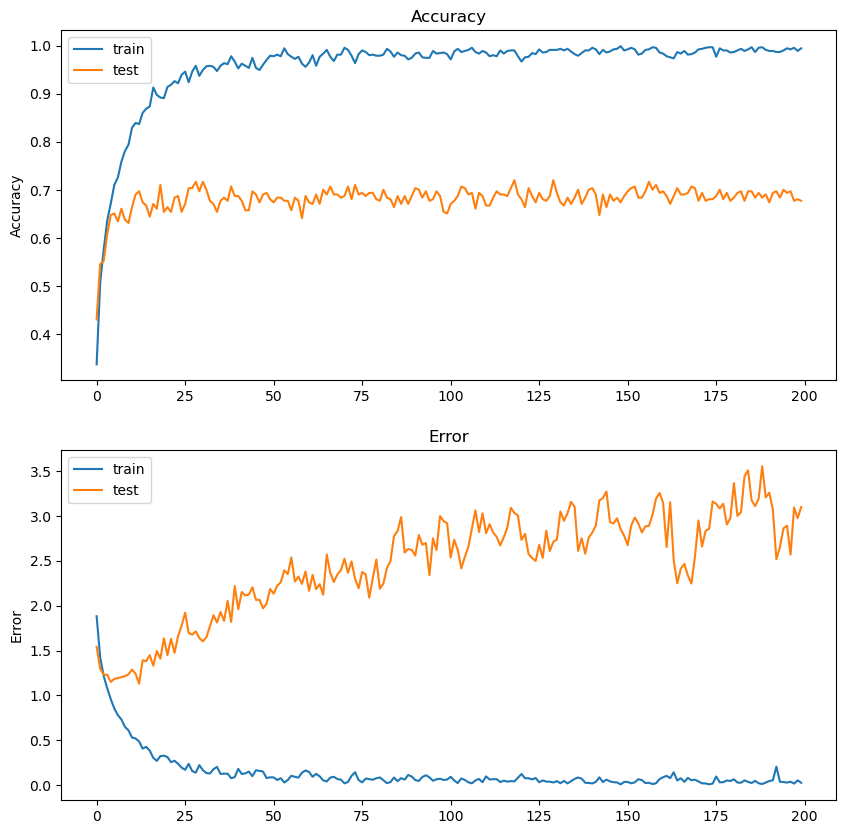

In [54]:
fig, axs = plt.subplots(2,figsize=(10,10))
  
# accuracy 
axs[0].plot(cnn.history["accuracy"], label="train")
axs[0].plot(cnn.history["val_accuracy"], label="test")    
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")
      
# Error 
axs[1].plot(cnn.history["loss"], label="train")
axs[1].plot(cnn.history["val_loss"], label="test")    
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")
      
plt.show()

In [55]:
score_test = model.evaluate(X_ts_sc, y_test, verbose=0)
print("Testing Accuracy: ", score_test[1])
print("Testing Cross Entropy: %.2f" % score_test[0])

score_test = model.evaluate(X_v_sc, y_val, verbose=0)
print("Val Accuracy: ", score_test[1])
print("Val Cross Entropy: %.2f" % score_test[0])

Testing Accuracy:  0.7631579041481018
Testing Cross Entropy: 2.40
Val Accuracy:  0.6776315569877625
Val Cross Entropy: 3.10


In [56]:
y_hat=model.predict(X_ts_sc)
y_pred=np.argmax(y_hat, axis=1)

10/10 [==============================] - 0s 2ms/step


## CNN Model 5 *Adding Layers*

In [57]:
print(X_train.shape, X_test.shape, X_val.shape, len(y_train), len(y_test), len(y_val))

(909, 39) (304, 39) (304, 39) 909 304 304


In [58]:
model_2 = Sequential()

model_2.add(Flatten(input_shape = ((X_tr_sc.shape[1],))))
model_2.add(layers.Dense(512, activation = 'relu'))
model_2.add(BatchNormalization())

model_2.add(layers.Dense(256, activation = 'relu'))
model_2.add(layers.Dropout(0.2))
    
model_2.add(layers.Dense(128, activation = 'relu'))
model_2.add(layers.Dropout(0.2))
    
model_2.add(layers.Dense(64, activation = 'relu'))
model_2.add(layers.Dropout(0.2))
    
model_2.add(layers.Dense(10, activation = 'softmax'))

In [59]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 39)                0         
                                                                 
 dense_5 (Dense)             (None, 512)               20480     
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                      

In [60]:
model_2.compile(optimizer = 'Adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [61]:
cnn_2 = model_2.fit(X_tr_sc, y_train, 
                epochs = 100, batch_size = 32,
               validation_data = (X_v_sc, y_val))

Epoch 1/100
29/29 [==============================] - 2s 13ms/step - loss: 1.8583 - accuracy: 0.3553 - val_loss: 1.8649 - val_accuracy: 0.4901
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 1.3667 - accuracy: 0.5281 - val_loss: 1.7128 - val_accuracy: 0.5329
Epoch 3/100
29/29 [==============================] - 0s 7ms/step - loss: 1.1100 - accuracy: 0.6172 - val_loss: 1.5664 - val_accuracy: 0.5592
Epoch 4/100
29/29 [==============================] - 0s 7ms/step - loss: 1.0001 - accuracy: 0.6524 - val_loss: 1.4363 - val_accuracy: 0.6283
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 0.8876 - accuracy: 0.6964 - val_loss: 1.2806 - val_accuracy: 0.6414
Epoch 6/100
29/29 [==============================] - 0s 7ms/step - loss: 0.7531 - accuracy: 0.7415 - val_loss: 1.1962 - val_accuracy: 0.5954
Epoch 7/100
29/29 [==============================] - 0s 6ms/step - loss: 0.7036 - accuracy: 0.7679 - val_loss: 1.0757 - val_accuracy: 0.6480
Epoch 8/100


Epoch 59/100
29/29 [==============================] - 0s 6ms/step - loss: 0.1196 - accuracy: 0.9571 - val_loss: 1.7977 - val_accuracy: 0.6842
Epoch 60/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0998 - accuracy: 0.9659 - val_loss: 1.8104 - val_accuracy: 0.6974
Epoch 61/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0751 - accuracy: 0.9747 - val_loss: 1.8049 - val_accuracy: 0.6908
Epoch 62/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0496 - accuracy: 0.9813 - val_loss: 1.7478 - val_accuracy: 0.6875
Epoch 63/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0859 - accuracy: 0.9747 - val_loss: 1.6330 - val_accuracy: 0.7237
Epoch 64/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0907 - accuracy: 0.9703 - val_loss: 1.6912 - val_accuracy: 0.7007
Epoch 65/100
29/29 [==============================] - 0s 6ms/step - loss: 0.1077 - accuracy: 0.9604 - val_loss: 1.7872 - val_accuracy: 0.6908
Epoch 

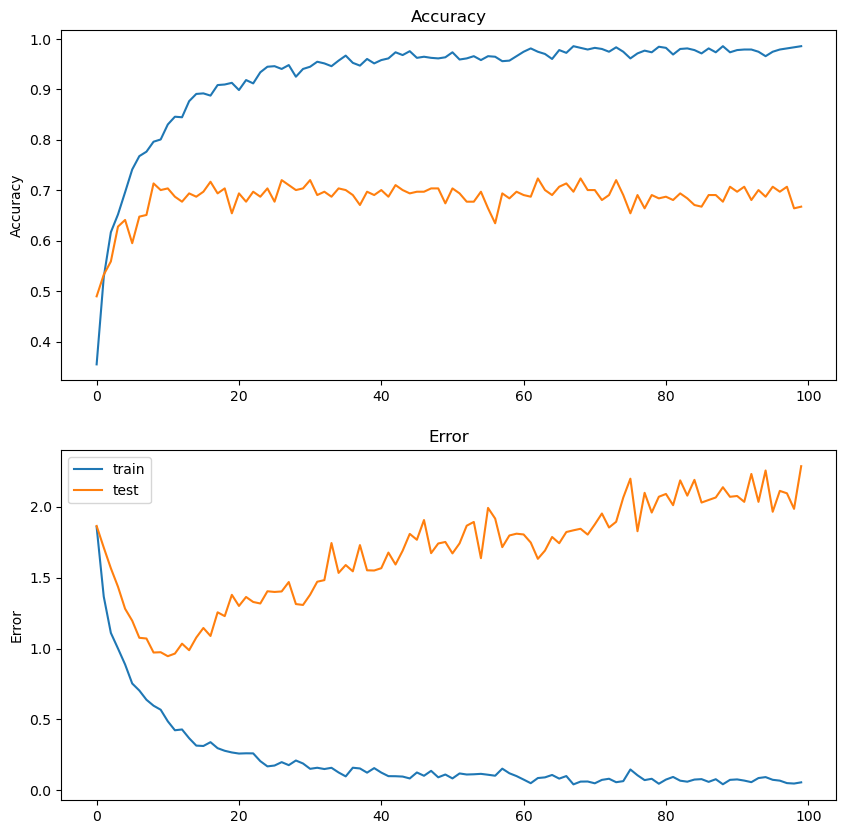

In [62]:
fig, axs = plt.subplots(2,figsize=(10,10))
  
# accuracy 
axs[0].plot(cnn_2.history["accuracy"], label="train")
axs[0].plot(cnn_2.history["val_accuracy"], label="test")    
axs[0].set_ylabel("Accuracy")
axs[0].legend
axs[0].set_title("Accuracy")
      
# Error 
axs[1].plot(cnn_2.history["loss"], label="train")
axs[1].plot(cnn_2.history["val_loss"], label="test")    
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")
      
plt.show()

In [63]:
test_error, test_accuracy = model_2.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

10/10 [==============================] - 0s 3ms/step - loss: 783.3311 - accuracy: 0.1743
Test accuracy: 0.1743421107530594


In [64]:
score_test = model_2.evaluate(X_ts_sc, y_test, verbose=0)
print("Testing Accuracy: ", score_test[1])
print("Testing Cross Entropy: %.2f" % score_test[0])

score_test = model_2.evaluate(X_v_sc, y_val, verbose=0)
print("Val Accuracy: ", score_test[1])
print("Val Cross Entropy: %.2f" % score_test[0])

Testing Accuracy:  0.7763158082962036
Testing Cross Entropy: 1.63
Val Accuracy:  0.6677631735801697
Val Cross Entropy: 2.29
